In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as plot_tree

# Load dataset
data = pd.read_csv('Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.info()
data.isnull().sum()
data.describe()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [3]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size= 0.2 , random_state= 42 )

model = DecisionTreeClassifier( max_depth= 5 , random_state= 42 )
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
# y_pred = model.predict([[6,148,72,35,0,33.6,0.627,50]])
# y_pred
# print("Predicted class:", y_pred[0])  # Output will be either 0 or 1

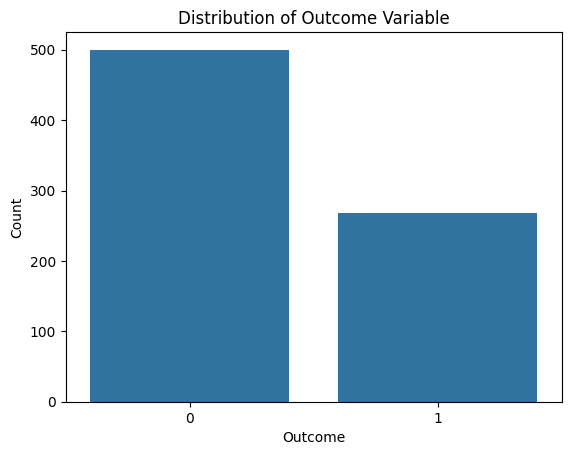

In [7]:
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [8]:
print(type(y_pred))
print(y_pred.shape)
print(len(y_pred))


<class 'numpy.ndarray'>
(154,)
154


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7922077922077922
[[87 12]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [10]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

AUC-ROC: 0.7575757575757576


In [11]:
y_prob = model.predict_proba(x_test)[:, 1]
y_prob

array([0.42465753, 0.08196721, 0.        , 0.        , 0.        ,
       0.42465753, 0.        , 0.74193548, 0.62962963, 0.62962963,
       0.42465753, 0.78571429, 1.        , 0.74193548, 0.        ,
       0.26470588, 0.08196721, 0.        , 0.41666667, 0.375     ,
       0.42465753, 0.06896552, 0.42465753, 0.08196721, 0.62962963,
       1.        , 0.        , 0.        , 0.08196721, 0.06896552,
       0.375     , 0.84848485, 0.78571429, 1.        , 0.74193548,
       0.84848485, 1.        , 0.74193548, 0.42465753, 1.        ,
       0.        , 1.        , 0.74193548, 0.42465753, 0.        ,
       0.375     , 0.74193548, 0.08196721, 0.        , 1.        ,
       0.        , 0.84848485, 0.84848485, 0.17647059, 0.        ,
       0.        , 0.        , 0.        , 0.26470588, 0.78571429,
       0.84848485, 0.08196721, 0.17647059, 0.06896552, 0.08196721,
       0.375     , 0.        , 0.62962963, 0.        , 1.        ,
       0.84848485, 0.06896552, 0.        , 0.08196721, 0.     

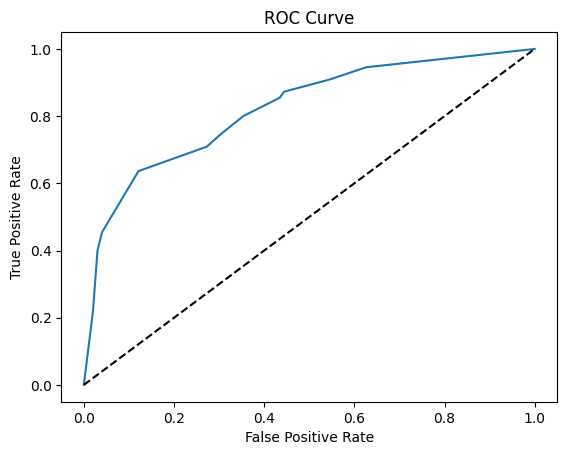

In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label = f"(AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')   
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
